# 1.1. Flask Rest API with Vue

### **`CDN`** ?

- **Contents Delivery Network**
- 지리적, 물리적으로 떨어져 있는 사용자에게 컨텐츠 제공자의 컨텐츠를 더 빠르게 제공할 수 있는 기술
- 사용자가 멀리 있는 서버로부터 컨텐츠를 다운로드 받는 경우에는 시간이 오래 걸리게 되므로, 사용자와 가까운 **Cache Server** 에 컨텐츠를 저장 및 제공
- **CDN** 을 사용하면 **CSS**, **JS** 파일을 로컬 서버에 저장하지 않고도, 웹페이지 오픈 시 자동으로 해당 파일들을 다운로드하여 제공받을 수 있다.

### **`Vue + Axios`**

- **Axios** 를 활용하여 **Flask Rest API** 를 호출할 수 있다.
- **Vue** 와 **Axios** 를 추가하는 코드를 **body** 태그 가장 아래에 위치시킨다.

```html
<script src="https://cdn.jsdelivr.net/npm/vue/dist/vue.js"></script>
<script src="https://unpkg.com/axios/dist/axios.min.js"></script>
```

- 이후 **html** 내에서 **Vue** 를 통해 관리될 부분을 위와 같이 **div** 태그로 감싼다.
- 이 때, **id** 는 **app** 으로 지정하였다.
- 이를 통해 **html** 에서 해당 부분을 동적으로 변경할 수 있으며, **Vue** 는 해당 **div** 태그 내에 접근이 가능하다.

```html
<div id="app">
    <button type="button" class="btn btn-primary">GET</button>
</div>
```

- 이제 변경시킬 요소에 **이벤트 속성** 과 **실행될 함수명** 을 추가해준다.
- **`<v-on:{event}="{func_name}">`**

```html
<div id="app">
    <button type="button" class="btn btn-primary" v-on:click="axios_test">GET</button>
</div>
```

- 마지막으로 **axios_test** 함수의 동작을 정의해주면 된다.

```html
<script>
      const app = new Vue({
        el: "#app",
        methods: {
          axios_test() {
            axios("http://localhost:8082/test", {
              method: "get",
            })
              .then((response) => {
                console.log(response);
              })
              .catch((error) => {
                console.log(error);
              });
          },
        },
      });
    </script>
```

- **el** 에서는 앞서 설정한 **div** 태그의 **id** 와 동일한 값을 지정해주어야 한다.
- 이제 웹페이지가 오픈되면, **id** 가 **app** 인 **div** 태그를 관리하는 **Vue** 객체가 생성되게 된다.
- 이어서, 생성된 **Vue** 객체 내에는 **axios_test** 라는 이름의 메서드가 존재하는 것을 확인할 수 있다.
- **axios_test()** 내부의 **axios** 를 통해 해당 **URL** 에 **GET** 요청이 전달되게 된다.

# 1.2. CORS(Cross Origin Resource Sharing)

- 기본적으로 웹에서는 특정 서버의 웹페이지가 다른 서버의 웹페이지 데이터를 참조할 수 있다.
- 이 때, **HTTP Request** 를 활용해 데이터를 요청한다.
    - 예:
        * 내가 접속한 웹페이지: www.google.com
        * 요청할 데이터: www.naver.com/search?key=google.jpg
<br>
<br>
- 하지만 데이터가 다음과 같이 **script** 태그로 둘러싸여 있는 경우에는 이러한 **HTTP Request** 가 **Same Origin Policy** 에 의해 차단된다.
```html
<script></script>
```
<br>
- 즉, **script** 태그로 둘러싸인 코드에 대한 **HTTP Request** 는 동일한 **Origin Server** 에만 요청이 가능하다는 정책인 것이다.
- 정확하게는, **프로토콜**과 **호스트명**, **포트**가 동일하여야 한다.

- 하지만, **ajax**, **axios** 와 같은 **js** 코드를 활용한 **HTTP Request** 가 가능해짐에 따라 다른 서버의 데이터 요청을 지원하여야 할 필요성이 생기게 되었고,
- **CORS(Cross Origin Resource Sharing)** 라는 가이드가 마련되었다.

### **`CORS Error Msg`**

- **HTTP Response** 의 헤더에 **`Access-Control-Allow-Origin`** 관련 정보가 존재하지 않으므로, 브라우저의 정책에 따라 **Cross Domain** 을 허용하지 않는다.

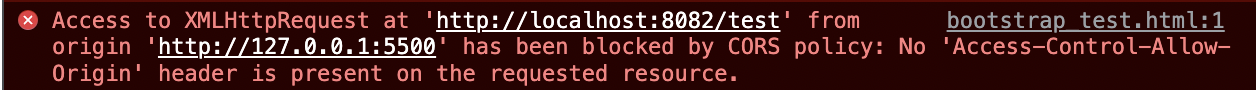

### **`Flask CORS`**

- **flask_cors** 라이브러리
```
pip install flask_cors
```

- 전체 Flask 서비스에 **CORS** 지원
- 위와 같이 **CORS** 로 감싸주면, 모든 요청 및 응답 메시지 헤더에 **CORS** 지원 헤더 정보가 추가

In [ ]:
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

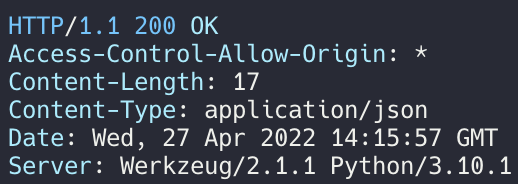

# 1.3. Rest API Method 정의

- Flask 에서 API 를 정의할 때, 지원 가능한 **Methods** 를 함께 명시해줄 수 있다.
    - **Method** 별로 요청 시 **Parameter** 값을 받아오는 방식에 차이가 있다.
        - **GET, PUT, DELETE** 는 동일
        - **POST** 는 상이
<br>
<br>
- **Methods** 를 **routes** 와 함께 명시해주지 않을 경우, **GET** 만 사용 가능
<br>
<br>
- **API** 의 리턴값은 주로 Flask 의 **jsonify()** 를 사용하여 **JSON** 포맷으로 전송한다.

### **`test.py`**

In [ ]:
@app.route("/test", methods=['GET', 'POST', 'PUT', 'DELETE'])
def test():
    if request.method == 'POST':
        print ('POST')
        data = request.get_json()
        print (data['email'])
    if request.method == 'GET':
        print ('GET')
        user = request.args.get('email')
        print (user)
    if request.method == 'PUT':
        print ('PUT')
        user = request.args.get('email')
        print (user)
    if request.method == 'DELETE':
        print ('DELETE')
        user = request.args.get('email')
        print (user)

    return jsonify(
        {'status': 'success'}
    )

- 위 예시에서는 **Decorator** 에 지원 가능한 **Methods** 를 명시해주었으며,
<br>
<br>
- **GET, PUT, DELETE** 는 **request.args.get()**
- **POST** 는 **request.get_json()** 을 사용하였다.
<br>
<br>
- 또한, **request.method** 를 활용하여 현재 요청의 메서드를 확인할 수 있다.

### **`axios_test.html`**

- 각 버튼은 클릭 이벤트 발생 시, **javascript** 로 작성된 함수를 실행

```html
    <button type="submit" class="btn btn-secondary" v-on:click="test_get">GET TEST</button>
    <button type="submit" class="btn btn-secondary" v-on:click="test_post">POST TEST</button>
    <button type="submit" class="btn btn-secondary" v-on:click="test_put">PUT TEST</button>
    <button type="submit" class="btn btn-secondary" v-on:click="test_delete">DELETE TEST</button>
```

- 각 함수는 아래와 같이 정의

```javascript
test_get: () => {
axios("http://localhost:5000/test", {
  method: "get",
  params: {
    email: "test@test.com",
  }
})
  .then((response) => {
    console.log(response.data['status']);
  })
  .catch((error) => {
    console.log(error);
  });
},
    
test_post: () => {
axios("http://localhost:5000/test", {
  method: "post",
  data: {
    email: "test@test.com",
  }
})
  .then((response) => {
    console.log(response.data["status"]);
  })
  .catch((error) => {
    console.log(error);
  });
},
    
test_put: () => {
axios("http://localhost:5000/test", {
  method: "put",
  params: {
    email: "test@test.com",
  }
})
  .then((response) => {
    console.log(response.data["status"]);
  })
  .catch((error) => {
    console.log(error);
  });
},
    
test_delete: () => {
axios("http://localhost:5000/test", {
  method: "delete",
  params: {
    email: "test@test.com",
  }
})
  .then((response) => {
    console.log(response.data["status"]);
  })
  .catch((error) => {
    console.log(error);
  });
}
```

- **Vue** 에서 **axios** 로 **HTTP** 를 요청하는 코드
  - HTTP 요청 메서드는 **method:** 에 명시
  - **GET, PUT, DELETE** 는 **params:** 에 데이터를 **JSON** 포맷으로 명시
  - **POST** 는 **data** 에 데이터를 **JSON** 포맷으로 명시
<br>
<br>
- **JSON** 포맷으로 리턴된 응답은 **response.data** 에 담겨져 있으므로, **JSON** 포맷 방식으로 접근 가능

# 1.4. HTML Form 을 활용한 Rest API

### **`HTML Form`**

- 이전에 활용했던 **HTML** 내에서 **form** 태그를 활용하는 방식은 **GET** 과 **POST** 만 지원

```html
<form action="/login" method="get">
    <p>user_name <input type="text" name="user_name" /></p>
    <p>password <input type="text" name="password" /></p>
    <p>email <input type="text" name="email" /></p>
    <p><input type="submit" value="submit" /></p>
</form>
```

```html
<form action="/login" method="post">
    <p>user_name <input type="text" name="user_name" /></p>
    <p>password <input type="text" name="password" /></p>
    <p>email <input type="text" name="email" /></p>
    <p><input type="submit" value="submit" /></p>
</form>
```